In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [13]:
train_df = pd.read_csv('../training.csv') # split for test and train set is ready
test = pd.read_csv('../test.csv')

# 1. Splitting the data

In [14]:
df = train_df

y = df["IsBadBuy"]
X = df

del X["IsBadBuy"]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)


train = pd.DataFrame(X_train.join(y_train))
val = X_val.join(y_val)

In [16]:
val.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
10580,10589,5/11/2010,MANHEIM,2004,6,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,BLUE,...,8885.0,NaN,NaN,18822,77041,TX,5685.0,0,569,0
27667,27686,4/22/2009,MANHEIM,2006,3,CHRYSLER,PACIFICA AWD 3.5L V6,Bas,4D SPORT,GOLD,...,11956.0,NaN,NaN,5546,32824,FL,6645.0,0,1857,0
60595,60624,9/16/2010,MANHEIM,2002,8,FORD,ESCAPE 2WD V6,XLS,4D CUV 3.0L XLS,GREEN,...,7897.0,NaN,NaN,23359,92337,CA,5480.0,0,1353,0
60484,60513,2/13/2009,ADESA,2005,4,DODGE,DURANGO 4WD V8 SEFI,SLT,4D SUV 5.7L SLT,RED,...,13878.0,NaN,NaN,23359,91752,CA,8375.0,0,1763,0
48363,48387,2/4/2010,MANHEIM,2006,4,PONTIAC,MONTANA FWD,SV6,4D MINIVAN EXT 3.5L,GOLD,...,14091.0,NaN,NaN,18111,47129,IN,6475.0,0,2282,0


In [17]:
train.columns

Index(['RefId', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'IsBadBuy'],
      dtype='object')

# 2. 'preprocessing'

In [26]:
X_train = X_train.select_dtypes(include=np.number)
X_train = X_train.fillna(np.mean)

In [27]:

X_val = X_val.select_dtypes(include=np.number)
X_val = X_val.fillna(np.mean)

In [39]:
X_whole = X.select_dtypes(include=np.number)
X_whole = X_whole.fillna(np.mean)

In [28]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_val: {X_val.shape}')

Shape of X_train: (51088, 9)
Shape of X_val: (21895, 9)


In [29]:
X_train.head()

,RefId,VehYear,VehicleAge,VehOdo,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
51596,51624,2004,5,84628,99750,80011,6800.0,0,1893
7358,7365,2003,6,80410,18111,30272,10775.0,0,1413
66010,66042,2006,3,72867,17675,28273,6890.0,0,803
39674,39697,2006,4,65177,20234,85353,6870.0,0,923
12486,12495,2006,4,53748,21053,95673,7350.0,0,837


In [30]:
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

Shape of y_train: (51088,)
Shape of y_val: (21895,)


# 4. Random Forest Classifier



In [31]:
from sklearn.ensemble import RandomForestClassifier    
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [42]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [43]:
y_pred = rf.predict(X_val)

In [44]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     21871
           1       0.01      0.67      0.01        24

    accuracy                           0.88     21895
   macro avg       0.50      0.77      0.47     21895
weighted avg       1.00      0.88      0.93     21895



In [35]:
confusion_matrix(y_val, y_pred)

array([[19194,     8],
       [ 2677,    16]], dtype=int64)

# 5. Parameter Tuning

In [40]:
k_values = [i for i in range (5,31,2)]
scores = []

for k in k_values:
    rf = RandomForestClassifier(max_depth=k)
    score = cross_val_score(rf, X_whole, y, cv=5)
    scores.append(np.mean(score))
    print(f"{k} job done")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\tymot\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\tymot\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
TypeError: float() argument must be a string or a number, not 'function'


Text(0, 0.5, 'Accuracy Score')

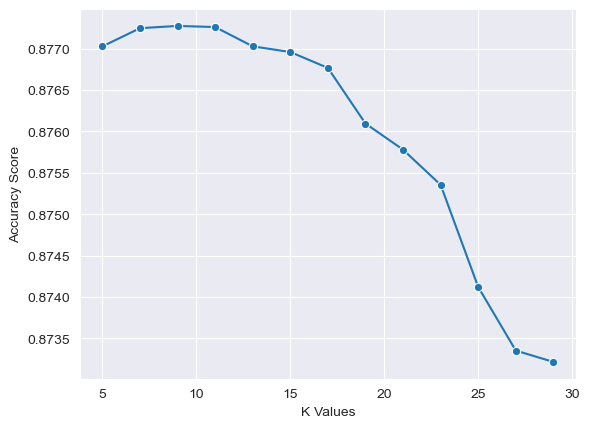

In [45]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [36]:
print(classification_report(y_pred, y_val)) # those results ain't anyhow better

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     21184
           1       0.22      0.83      0.35       711

    accuracy                           0.90     21895
   macro avg       0.61      0.87      0.65     21895
weighted avg       0.97      0.90      0.93     21895



In [37]:
confusion_matrix(y_val, y_pred)

array([[19081,   121],
       [ 2103,   590]], dtype=int64)

# feature importance

In [48]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
6,VehBCost,0.212671
3,VehOdo,0.156696
0,RefId,0.144232
2,VehicleAge,0.131486
8,WarrantyCost,0.098652
5,VNZIP1,0.087679
1,VehYear,0.082815
4,BYRNO,0.081238
7,IsOnlineSale,0.004532


In [63]:
from sklearn import metrics
import shap

def gini_roc(y_test, y_pred_proba, tytul):
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    
    plt.plot(fpr,tpr)
    plt.title(tytul)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    roc_auc = metrics.auc(fpr, tpr)
    gini = (2 * roc_auc) - 1

    return gini

def gini_train_val(model, X_train, y_train, X_val, y_val):
    
    y_pred_proba = model.predict_proba(X_train)[::,1]
    gini_train = gini_roc(y_train, y_pred_proba, "ROC Curve for Training Sample")
    print("gini_train: %.4f" % gini_train)
    
    y_pred_proba = model.predict_proba(X_val)[::,1]
    gini_val = gini_roc(y_val, y_pred_proba, "Roc Curve for Validation Sample")
    print("gini_val: %.4f" % gini_val)

    return

def shapley(model, X_train, X_val):
        
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
    # model = lr
   
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)

    if len(shap_values.shape) > 2:
        shap_values = shap_values[:, :, 1] # for some reason it has 3 dimensions

    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")    
    
    

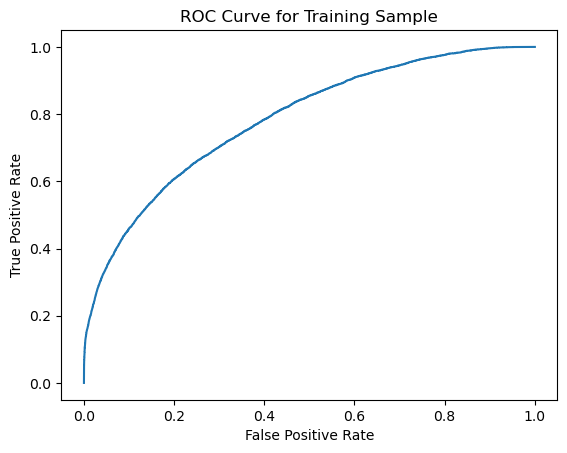

gini_train: 0.5684


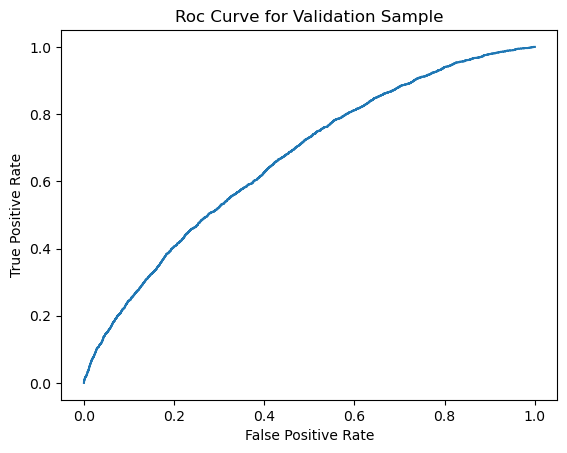

gini_val: 0.3344


In [51]:
gini_train_val(rf, X_train, y_train, X_val, y_val)

no tak srednio bym powiedzial

3

In [52]:
explainer = shap.Explainer(rf, X_train)
    
shap_values = explainer(X_train)

100%|===================| 102157/102176 [228:17<00:02]        

In [67]:
shap.plots.force(shap_values[1, :, 1])
    
shap.plots.heatmap(shap_values[:, :, 1])

KeyboardInterrupt: 

# Final outputs

In [138]:
test = pd.read_csv('../test.csv')

In [139]:
X_test = test.copy()
X_test

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [140]:
X_test = prepipe.transform(X_test)
X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=colnames)

Categorical columns transformed.
MMR Columns imputed.
Done preprocessing


In [141]:
y = rf.predict(X_test)
pd.DataFrame(y, columns=["IsBadBuy"]).join(test["RefId"]).to_csv("../out.csv", index=False)